In [54]:
import sqlite3
import pandas as pd
import  numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
db = 'vg_sales.db'

# Function that creates a SQL query and returns a pandas dataframe.
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
    
# Function that takes a SQL command as argument and executives it using the sqlite module.
def run_command(c):
    with sqlite.connect(db) as conn:
        conn.isolation_level = None 
        conn.execute(c)
        
# Function that calls the run_query() function to return a list of all tables and views in the database. 
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)
# Run the function below to see all the tables and views in vg_sales.db
show_tables()

,name,type
0,TITLES,table
1,SALES,table
2,SCORES,table


In [56]:
# What is the percentage of all sales for each genre?
q1 = '''
SELECT t.genre, COUNT(*) sales, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM sales) sales_percentage
FROM titles t
INNER JOIN sales s
    ON s.unique_id = t.unique_id
GROUP BY 1
ORDER BY 2 DESC
'''
genre_sales = run_query(q1)
genre_sales

,Genre,sales,sales_percentage
0,Action,3370,20.156708
1,Sports,2348,14.043902
2,Misc,1750,10.467133
3,Role-Playing,1500,8.971828
4,Shooter,1323,7.913153
5,Adventure,1303,7.793528
6,Racing,1249,7.470542
7,Platform,888,5.311322
8,Simulation,874,5.227585
9,Fighting,849,5.078055


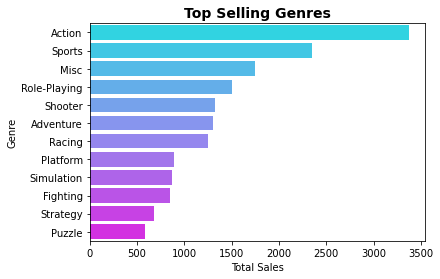

In [57]:
ax = sns.barplot(x='sales', y='Genre', data=genre_sales, palette='cool')
ax.set_title('Top Selling Genres', size=14, weight='bold')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Genre')
plt.show()

In [58]:
# Who are the top publishers?
q2 = '''
SELECT publisher, COUNT(name) num_of_games, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM titles) total_game_percentage
FROM titles
GROUP BY publisher
ORDER BY num_of_games DESC
LIMIT 10
'''
top_publishers = run_query(q2)
top_publishers

,Publisher,num_of_games,total_game_percentage
0,Electronic Arts,1356,8.110533
1,Activision,985,5.891501
2,Namco Bandai Games,939,5.616365
3,Ubisoft,933,5.580477
4,Konami Digital Entertainment,834,4.988337
5,THQ,715,4.276572
6,Nintendo,706,4.222741
7,Sony Computer Entertainment,687,4.109097
8,Sega,638,3.816018
9,Take-Two Interactive,422,2.524074


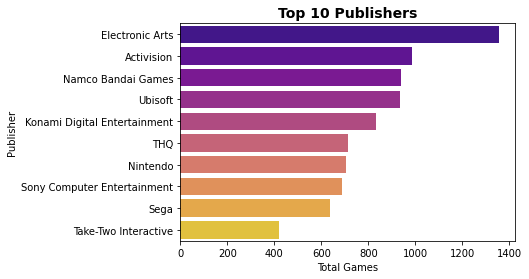

In [59]:
ax2 = sns.barplot(x='num_of_games', y='Publisher', data=top_publishers, palette='plasma')
ax2.set_title('Top 10 Publishers', size=14, weight='bold')
ax2.set_xlabel('Total Games')
ax2.set_ylabel('Publisher')
plt.show()

In [60]:
# What are the sales per region? Cannot convert columns to rows in sqlite.
q3 = '''
SELECT SUM(s.na_sales) na_sales, SUM(s.eu_sales) eu_sales, SUM(s.jp_sales) jp_sales, SUM(s.other_sales) other_sales, SUM(s.global_sales) global_sales
FROM sales s
INNER JOIN titles t
    ON t.unique_id = s.unique_id
'''
region_sales = run_query(q3)
region_sales

,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,4402.62,2424.67,1297.43,791.34,8920.3


In [61]:
# What is the average critic and user score for the top 5 publishers? One can see that critics tend to score higher than users.
q4 = '''
SELECT t.publisher, AVG(s.critic_score)/10 avg_critic_score, AVG(s.user_score) avg_user_score
FROM scores s
INNER JOIN titles t
    ON s.unique_id = t.unique_id
WHERE t.publisher IN ('Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment')
GROUP BY t.publisher
'''
avg_scores = run_query(q4)
avg_scores

,Publisher,avg_critic_score,avg_user_score
0,Activision,6.966784,4.927842
1,Electronic Arts,7.447619,6.330500
2,Konami Digital Entertainment,6.834451,5.188391
3,Namco Bandai Games,6.644803,6.155769
4,Ubisoft,6.851434,4.974619


In [62]:
m_avg_score = pd.melt(avg_scores, id_vars = 'Publisher')
m_avg_score

,Publisher,variable,value
0,Activision,avg_critic_score,6.966784
1,Electronic Arts,avg_critic_score,7.447619
2,Konami Digital Entertainment,avg_critic_score,6.834451
3,Namco Bandai Games,avg_critic_score,6.644803
4,Ubisoft,avg_critic_score,6.851434
5,Activision,avg_user_score,4.927842
6,Electronic Arts,avg_user_score,6.330500
7,Konami Digital Entertainment,avg_user_score,5.188391
8,Namco Bandai Games,avg_user_score,6.155769
9,Ubisoft,avg_user_score,4.974619


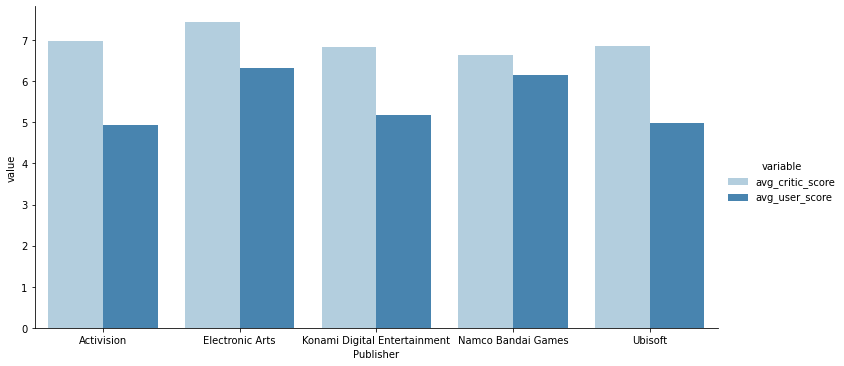

In [63]:
ax3 = sns.catplot(x='Publisher', y='value', hue='variable', data=m_avg_score, kind='bar', aspect=2, palette='Blues')
plt.show()

In [76]:
# Which year had the most releases?
q5 = '''
SELECT year_of_release, COUNT(*) num_of_titles
FROM titles
GROUP BY year_of_release
ORDER BY num_of_titles DESC
'''
release_yr_by_title = run_query(q5)
release_yr_by_title

,Year_of_Release,num_of_titles
0,2008.0,1427
1,2009.0,1426
2,2010.0,1255
3,2007.0,1197
4,2011.0,1136
5,2006.0,1006
6,2005.0,939
7,2002.0,829
8,2003.0,775
9,2004.0,762


In [77]:
release_yr_by_title['Year_of_Release'] = release_yr_by_title['Year_of_Release'].astype('category')

In [78]:
release_yr_by_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Year_of_Release  39 non-null     category
 1   num_of_titles    40 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.8 KB


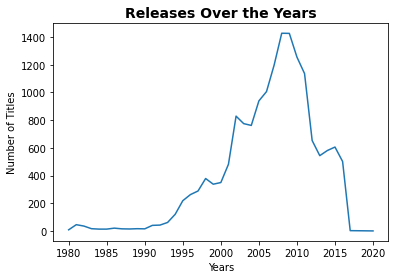

In [79]:
ax4 = sns.lineplot(x='Year_of_Release', y='num_of_titles', data=release_yr_by_title)
ax4.set_title('Releases Over the Years', size=14, weight='bold')
ax4.set_xlabel('Years')
ax4.set_ylabel('Number of Titles')
plt.show()

In [81]:
# What year had the most North America Sales?
q6 = '''
SELECT year_of_release, SUM(na_sales) NA_sales
FROM titles t
INNER JOIN sales s
    ON s.unique_id = t.unique_id
GROUP BY year_of_release
ORDER BY NA_sales DESC
'''
release_yr_by_sales = run_query(q6)
release_yr_by_sales

,Year_of_Release,NA_sales
0,2008.0,348.69
1,2009.0,335.55
2,2007.0,309.89
3,2010.0,300.65
4,2006.0,262.13
5,2005.0,242.15
6,2011.0,238.79
7,2004.0,222.51
8,2002.0,216.19
9,2003.0,193.61


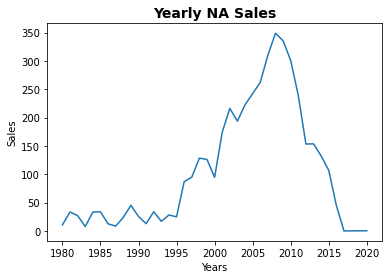

In [69]:
release_yr_by_sales['Year_of_Release'] = release_yr_by_sales['Year_of_Release'].astype('category')
ax5 = sns.lineplot(x='Year_of_Release', y='NA_sales', data=release_yr_by_sales)
ax5.set_title('Yearly NA Sales', size=14, weight='bold')
ax5.set_xlabel('Years')
ax5.set_ylabel('Sales')
plt.show()

In [70]:
# Which platform is most popular?
q7 = '''
SELECT t.platform, SUM(global_sales) global_sales
FROM titles t
INNER JOIN sales s
    ON s.unique_id = t.unique_id
GROUP BY platform
ORDER BY global_sales DESC
'''
platform_sales = run_query(q7)
platform_sales

,Platform,global_sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10
5,PS,730.68
6,GBA,318.50
7,PS4,314.23
8,PSP,294.30
9,PC,260.30


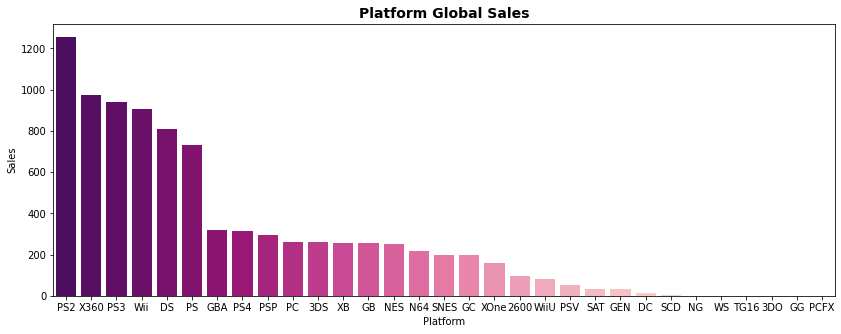

In [71]:
plt.figure(figsize=(14,5))
ax6 = sns.barplot(x='Platform', y='global_sales', data=platform_sales, palette='RdPu_r')
ax6.set_title('Platform Global Sales', size=14, weight='bold')
ax6.set_xlabel('Platform')
ax6.set_ylabel('Sales')
plt.show()

In [72]:
# What are the top games that customers critiqued highest?
q8 = '''
SELECT t.name, s.User_Score
FROM scores s
INNER JOIN titles t
    ON t.unique_id = s.unique_id
WHERE s.User_Score IS NOT NULL AND s.User_Score IS NOT 'tbd'
ORDER BY s.User_Score DESC, name ASC
LIMIT 10
'''
top_user_score = run_query(q8)
top_user_score

,Name,User_Score
0,Breath of Fire III,9.7
1,Boktai: The Sun is in Your Hand,9.6
2,Harvest Moon: Friends of Mineral Town,9.6
3,Cory in the House,9.5
4,Golden Sun: The Lost Age,9.5
5,Karnaaj Rally,9.5
6,MLB SlugFest Loaded,9.5
7,Super Puzzle Fighter II,9.5
8,Wade Hixton's Counter Punch,9.5
9,Advance Wars 2: Black Hole Rising,9.4


In [73]:
top_user_score['Name'] = top_user_score['Name'].astype('category')
top_user_score['User_Score'] = top_user_score['User_Score'].astype('float')

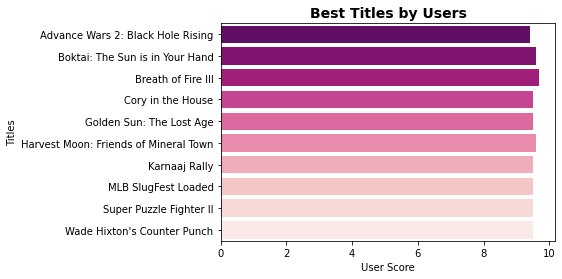

In [74]:
ax7 = sns.barplot(x='User_Score', y='Name', data=top_user_score, palette='RdPu_r')
ax7.set_title('Best Titles by Users', size=14, weight='bold')
ax7.set_xlabel('User Score')
ax7.set_ylabel('Titles')
plt.show()